In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('weight-height.csv')

In [4]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


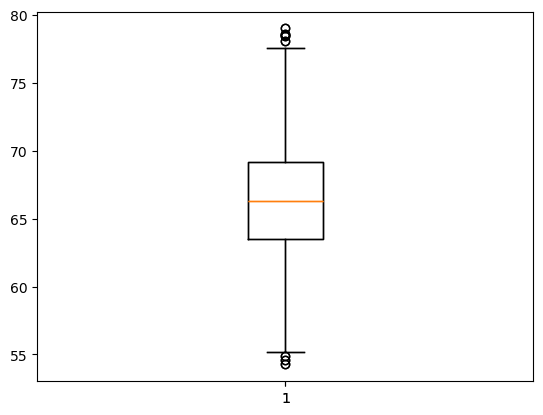

In [11]:
plt.boxplot(df['Height'])
plt.show()

In [13]:
lower_limit=df['Height'].quantile(0.01)
higher_limit=df['Height'].quantile(0.99)

In [14]:
lower_limit,higher_limit

(np.float64(58.13441158671655), np.float64(74.7857900583366))

In [18]:
# outliers
df[(df['Height'] >= higher_limit)|(df['Height'] <= lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [29]:
new_df=df[(df['Height'] <= higher_limit)&(df['Height'] >= lower_limit)]

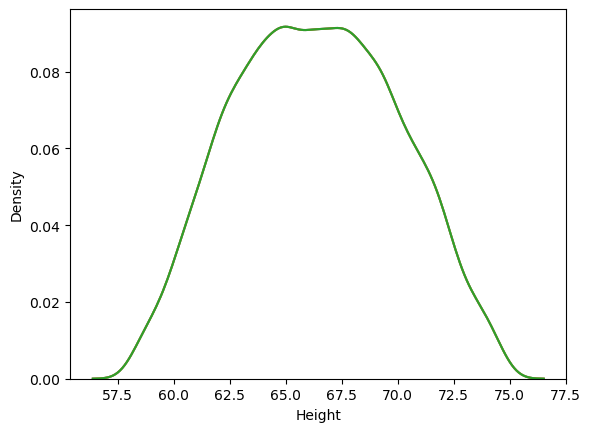

In [31]:
sns.kdeplot(new_df['Height'])
plt.show()

In [33]:
# caping --> winsorization
df['Height']=np.where(df['Height'] >= higher_limit,higher_limit,np.where(df['Height']<=lower_limit,lower_limit,df['Height']))

In [34]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [36]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.366281,161.440357
std,3.795717,32.108439
min,58.134412,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,74.785790,269.989699
